<a href="https://colab.research.google.com/github/NathanBrunet/ML-Project-Diabetes-Prediction/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>DSTI</b></h1></center>
<center><h1><b>Machine Learning with Python Labs</b></h1></center>
<center><h3><b>BRUNET Nathan - IBITOWA Abraham - HAOUA Anis Sofiane - KAKY SUZY Joelly Magalie - NIANG Falilou</b></h3></center><center><h1><b>Diabetes Prediction System</b></h1></center>

## Introduction

## Data Preprocessing

## Exploratory Data Analysis (EDA)

## Feature Engineering

## Model Selection and Training

## Evaluation Metrics

## Conclusion


## Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load the dataset
df_raw = pd.read_csv('TAIPEI_diabetes.csv')

# Make a copy of the DataFrame for modifications
df = df_raw.copy()

# General statistics and overview
print("Number of columns:")
print(df.shape[1])
print("First 5 columns of DF:")
display(df.head())
print(" Last 5 columns of DF: ")
display(df.tail())

#pouet
#hhfhbdidhvgzuioidshfvuhbdofivfihe zfbdonbhi zefonvfehifbonihvibijouivyugctxdfghjkjhgfdghjklkjhgfdfghjkl

Number of columns:
10
First 5 columns of DF:


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


 Last 5 columns of DF: 


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0
14999,1386396,3,114,65,47,512,36.215437,0.147363,34,1


In [ ]:
# Remove the first column which brings no information
df_noid = df.drop(columns=['PatientID']) #No ID
df_temp=df_noid
display(df_noid.describe())

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [ ]:
# No variable at 0 as minimums except for Pregnancies which seems logical: a good sign (to comment)
# Variables not on the same scales: need to normalize (or standardize)

# Check more surely for potential NaN values
na_values = df_noid.isna().sum()
print("Number of NaN per column :")
print(na_values)

# Check each column type
print(" Column types: ")
print(df_noid.dtypes)

Number of NaN per column :
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64
 Column types: 
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object


In [ ]:
# Check for duplicates in the DataFrame
num_duplicates = df_noid.duplicated().sum()

# Print the number of duplicates
print(f'Number of duplicates: {num_duplicates}')

# Remove the duplicates in place
df_noid.drop_duplicates(inplace=True)

# Verify that duplicates were removed
print(f'Number of rows after removing duplicates: {df_noid.shape[0]}')

Number of duplicates: 0
Number of rows after removing duplicates: 15000


<p style="text-align: justify;">Features/variables are of homogeneous types and there appears to be no problematic NaN values. The fact that there are 2 float type variables (BMI, DiabetesPedigree) as well as int type ones is not an issue for numerical analysis. According to our general statistics, no null values are to be noted in our dataset. However, there seems to be some outliers, class imbalances in our dataset to handle, and maybe the necessity to rescale and/or normalize our data.</p>

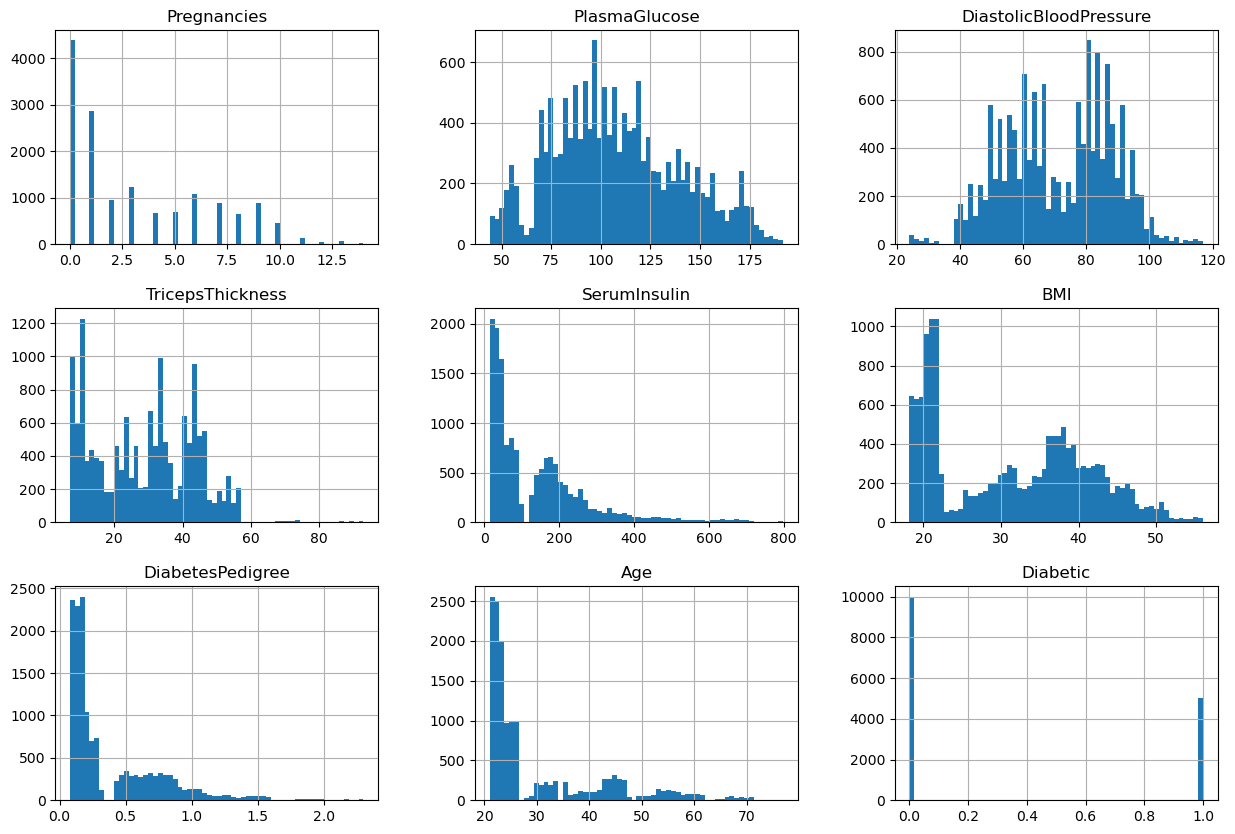

In [ ]:
df_noid.hist(bins=60, figsize=(15, 10))
plt.show()

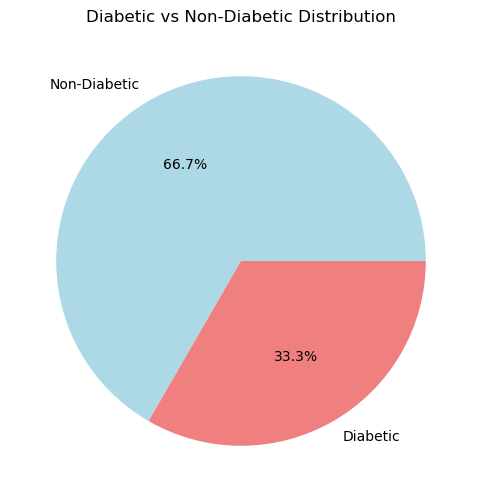

In [ ]:
# Count the number of people with and without diabetes
diabetes_counts = df_noid['Diabetic'].value_counts()

# Create a pie chart to visualize the distribution
plt.figure(figsize=(8, 6))
plt.pie(diabetes_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Diabetic vs Non-Diabetic Distribution')
plt.show()

<p style="text-align: justify;">As we can see, there is an imbalance in favor of the non-diabetic class. That's not extreme, but it's there. In reality, outside of our dataset, such an imbalance is not outrageous, since diabetes only affects about 11-12% of people worldwide (cf. study). However, even if the gap between classes isn't very large, our future model could be negatively influenced by class imbalance. The model could simply learn to predict the majority class (non-diabetics) with high accuracy, but perform poorly in predicting the minority class (diabetics). This could lead to a poor model, even if overall accuracy is high.
    
There are techniques to improve the model's ability to predict instances of the minority class (diabetics), which may be of greater interest here, since failing to detect a diabetic can be far more serious than incorrectly predicting a non-diabetic as a diabetic. Hence, we can try to use resampling techniques to see if it can be useful for the model performance metrics we'll choose.</p>

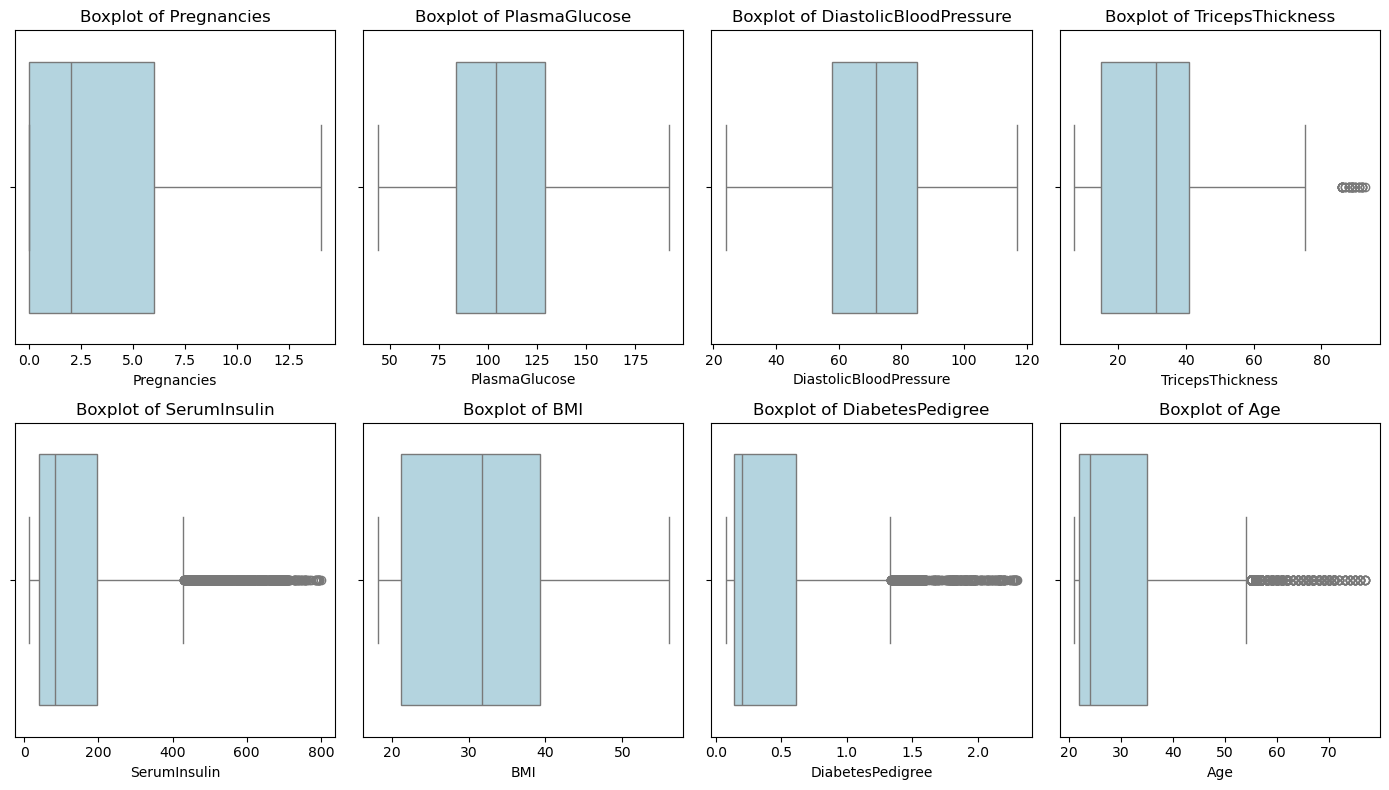

In [ ]:
# List of columns to exclude from plotting (PatientID and target variable)
features = df_noid.drop(columns=['Diabetic'])

# Create a figure for the boxplots
plt.figure(figsize=(14, 8))

# Loop through the features and create a boxplot for each
for i, col in enumerate(features.columns, 1):
    plt.subplot(2, 4, i)  # 2x4 grid of subplots
    sns.boxplot(data=df_noid, x=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
# Outlier detection, capping, skewness handling & Normalization of the data

from sklearn.preprocessing import PowerTransformer, MinMaxScaler

# Drop the 'Diabetic' column (categorical variable)
df_wt = df_noid.drop(columns=['Diabetic']) #WT for "Without Target"

# Detect outliers using IQR and print them

def preprocess_outliers(df, action):
    """
    Function to handle outliers in the dataframe based on the action parameter.
    action = 0: Winsorize outliers at 5th and 95th percentiles.
    action = 1: Remove rows with outliers beyond 5th and 95th percentiles.
    """
    for col in df.columns:
        lower_bound = df[col].quantile(0.05)
        upper_bound = df[col].quantile(0.95)

        if action == 0:  # Winsorization
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

        elif action == 1:  # Remove rows with outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Apply Yeo-Johnson transformation to handle skewness
pt = PowerTransformer(method='yeo-johnson', standardize=False)  # standardize=False to avoid automatic scaling
df_noid = pd.DataFrame(pt.fit_transform(df_noid), columns=df_noid.columns)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df_wt = pd.DataFrame(scaler.fit_transform(df_wt), columns=df_wt.columns)

# Print the processed DataFrame head
display(df_wt.describe())

Pregnancies: 0 outliers detected (0 below, 0 above)
PlasmaGlucose: 0 outliers detected (0 below, 0 above)
DiastolicBloodPressure: 0 outliers detected (0 below, 0 above)
TricepsThickness: 31 outliers detected (0 below, 31 above)
SerumInsulin: 666 outliers detected (0 below, 666 above)
BMI: 0 outliers detected (0 below, 0 above)
DiabetesPedigree: 475 outliers detected (0 below, 475 above)
Age: 1019 outliers detected (0 below, 1019 above)


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.348444,0.453813,0.514889,0.468364,0.288423,0.443060,0.278973,0.245491
std,0.355628,0.275723,0.309580,0.317396,0.287685,0.336875,0.311071,0.312903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.241071,0.254902,0.159091,0.051414,0.082378,0.045475,0.027778
50%,0.222222,0.419643,0.529412,0.522727,0.164524,0.457061,0.105452,0.083333
75%,0.666667,0.642857,0.784314,0.750000,0.452442,0.724192,0.504300,0.388889
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Pregnancies               0.650854
PlasmaGlucose             0.310813
DiastolicBloodPressure   -0.090064
TricepsThickness         -0.010445
SerumInsulin              1.011773
BMI                       0.090163
DiabetesPedigree          1.040912
Age                       1.260045
dtype: float64


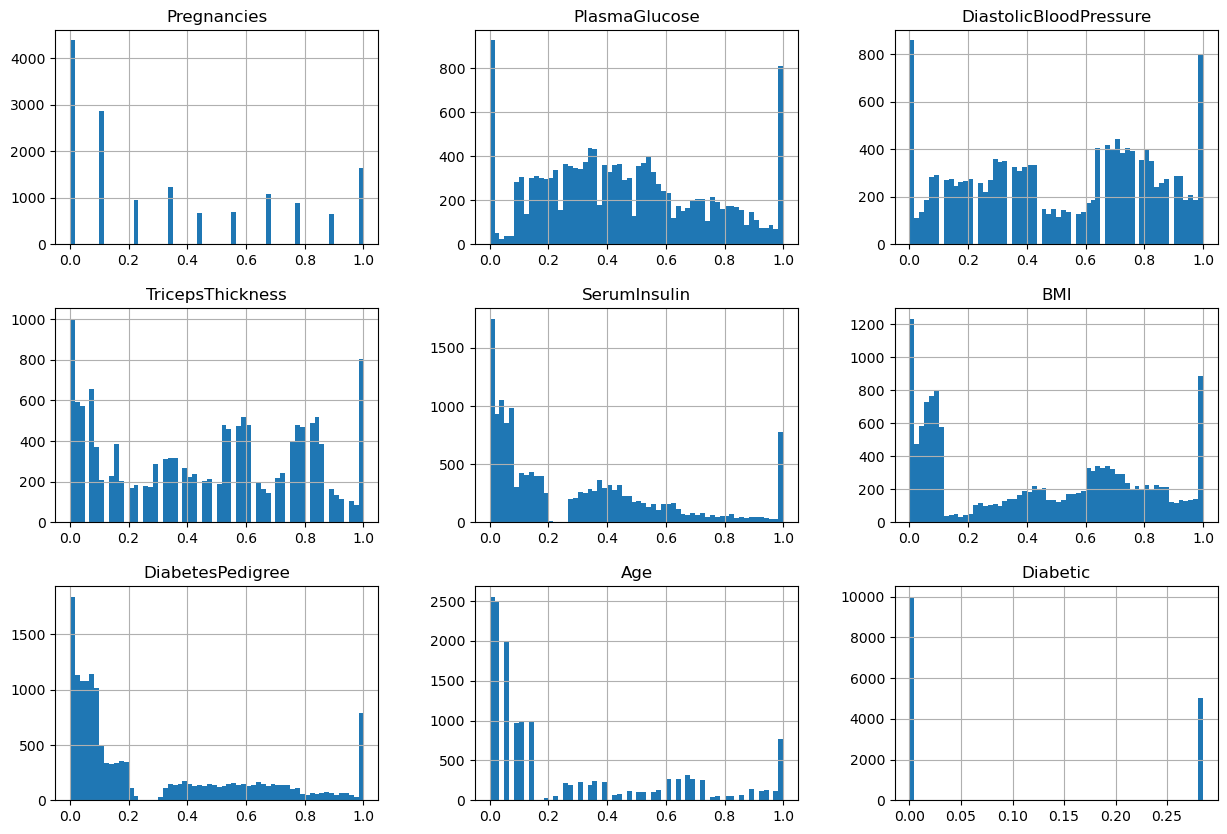

In [ ]:
from scipy.stats import skew

# Compute skewness for all columns in the DataFrame
skewness_all_columns = df_wt.apply(skew, axis=0)

# Print skewness for each column
print(skewness_all_columns)

df_wt['Diabetic'] = df_noid['Diabetic'].values
df_clean=df_wt # Preprocessed DF with target variable
df_clean.hist(bins=60, figsize=(15, 10))
plt.show()

In [ ]:
def target_density_est_with_num(dataframe,target, numerical_col):
    plt.figure(figsize=(15,8))
    ax = sns.kdeplot(df[col][df.Outcome == 1], color="green", shade=True)
    sns.kdeplot(df[col][df.Outcome == 0], color="red", shade=True)
    plt.legend(['Has Diabete', 'Has no Diabete'])
    plt.xlim(-10,150)
    plt.title("Diabetic Density of Numerical Variables")
    plt.show()

for col in num_cols:
    target_density_est_with_num(df,"Outcome",col)

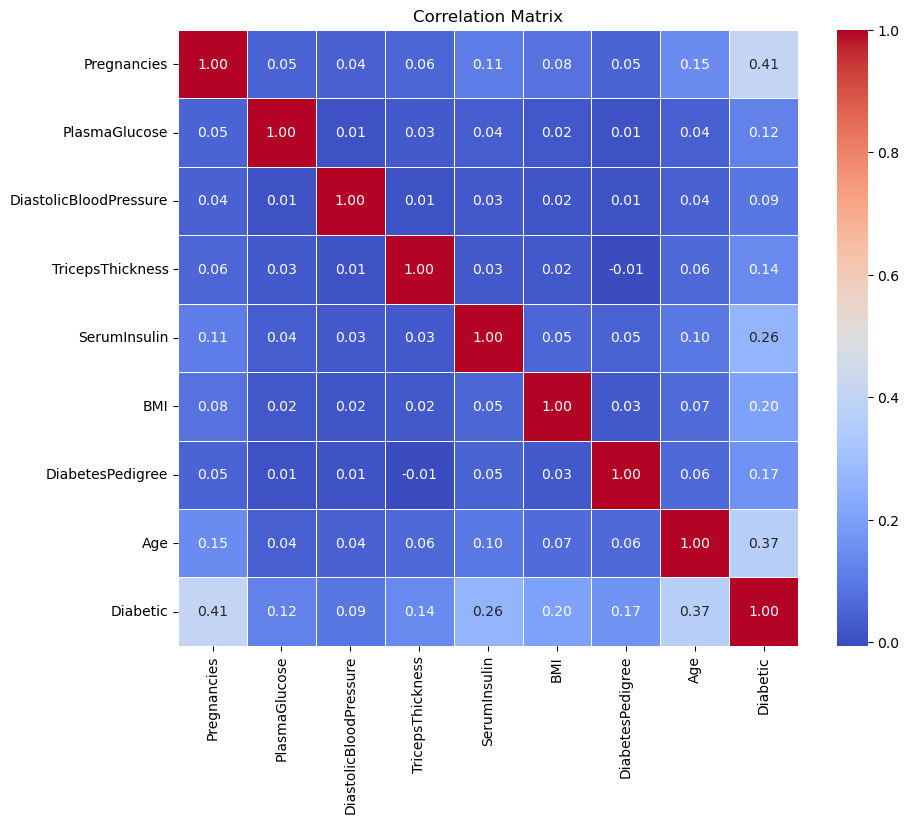

                        Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
Pregnancies                1.000000       0.051979                0.043952   
PlasmaGlucose              0.051979       1.000000                0.007041   
DiastolicBloodPressure     0.043952       0.007041                1.000000   
TricepsThickness           0.056324       0.026113                0.010803   
SerumInsulin               0.108961       0.035373                0.026029   
BMI                        0.083599       0.018866                0.017179   
DiabetesPedigree           0.051585       0.006863                0.012677   
Age                        0.146872       0.038403                0.042365   
Diabetic                   0.408063       0.123129                0.093286   

                        TricepsThickness  SerumInsulin       BMI  \
Pregnancies                     0.056324      0.108961  0.083599   
PlasmaGlucose                   0.026113      0.035373  0.018866   
DiastolicBloodP

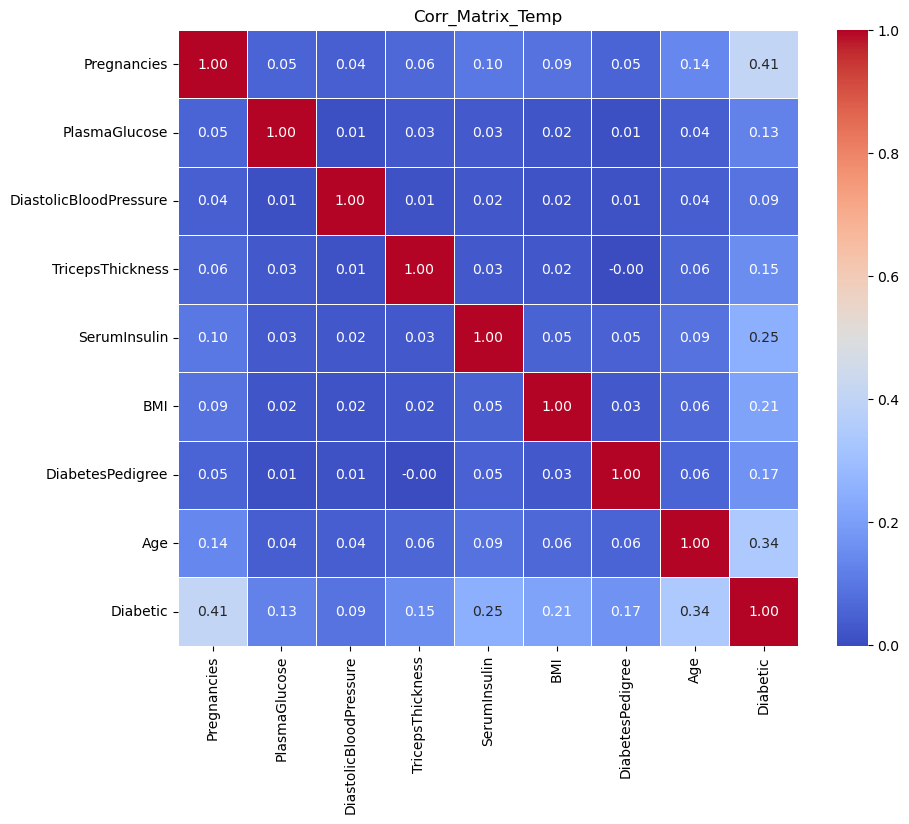

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_clean.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

corr_matrix_temp=df_temp.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_temp, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Corr_Matrix_Temp')
plt.show()

In [ ]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative explained variance:", cumulative_variance)

Cumulative explained variance: [0.1696251  0.29592215 0.41989789]


In [ ]:
""" Reste à faire :
- Cross Validation
- Modèles à définir (RF, LR, etc.)
- Métriques de succès à définir (F1-Score, AUC, Confusion Matrix...)
- Features importance (?)
- Comparaison des modèles
- Standardiser quand même maybe
- ETC....

https://diabetnutrition.ch/quest-ce-que-le-diabete/quest-ce-que-la-glycemie/
https://acutecaretesting.org/en/articles/measurement-of-circulating-glucose-the-problem-of-inconsistent-sample-and-methodology#:~:text=Plasma%20equivalent%20glucose%20(mmol%2FL,mg%2FdL)%20x%201.11.
#Useless de convertir PlasmaGlucose en BloodGlucose, ça sera juste redondant (" divisé par 1.11 " = inutile)
1    268
Name: Outcome, dtype: int64
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n")
    print("###################################")

for col in num_cols:
    target_summary_with_num(df,"Outcome",col)

    def target_density_est_with_num(dataframe,target, numerical_col):
    plt.figure(figsize=(15,8))
    ax = sns.kdeplot(df[col][df.Outcome == 1], color="green", shade=True)
    sns.kdeplot(df[col][df.Outcome == 0], color="red", shade=True)
    plt.legend(['Has Diabete', 'Has no Diabete'])
    plt.xlim(-10,150)
    plt.title("Diabetic Density of Numerical Variables")
    plt.show()

for col in num_cols:
    target_density_est_with_num(df,"Outcome",col)
